# Counting Boats from Space (Part 3) - Upscale Boat Traffic Monitoring

In [33]:
%reload_ext autoreload
%autoreload 2
%load_ext dotenv
%dotenv
%matplotlib inline

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


## 1. Display AOI on map

In [34]:
import os
import sys
import json
from datetime import datetime
from datetime import timedelta

In [35]:
end_date = str(datetime.now().date())
start_date = str(datetime.now().date() - timedelta(days = 30))
aoi_file_path = '../data/aoi.json'
interest = "Test"

data_dir="../data"
checkpoint_dir="../factory"
version="0.1.1"
time_period='1D'
max_cloud_proba=0.3 
override=True

In [36]:
print(str(end_date))
print(str(start_date))

2020-07-11
2020-06-11


In [37]:
sys.path.insert(0,os.path.dirname('../src/'))

In [28]:
# from dataset import plot_geoloc

In [29]:
# interests = ["EU_Fisheries", "EU_Fluvial", "EU_Ports", "EU_Straits", "EU_Tourism", "Misc", "Final"']

In [38]:
with open(aoi_file_path, 'r') as f:
    aoi_file = json.load(f)

# fig = plot_geoloc([lat_lon[:2] for snaps in list(aoi_file[interest].values()) for lat_lon in snaps], [lat_lon[:2] for snaps in list(aoi_file[interest].values()) for lat_lon in snaps])
# fig

## 2. Scan AOI

In [39]:
from serve import scan_AOI, analyze_boat_traffic

Loaded model version 0.1.1 on cuda:0
Sines_lat=37.88_lon=-8.91_r=7000_v=0.1.1
<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 1400, lon: 1400, time: 31)
Coordinates:
  * lat        (lat) float64 37.94 37.94 37.94 37.94 ... 37.82 37.82 37.82 37.82
  * lon        (lon) float64 -8.99 -8.989 -8.989 -8.989 ... -8.831 -8.831 -8.83
  * time       (time) datetime64[ns] 2020-06-11T12:00:00 ... 2020-07-11T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B03        (time, lat, lon) float32 dask.array<chunksize=(1, 1400, 1400), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 1400, 1400), meta=np.ndarray>
    CLP        (time, lat, lon) float32 dask.array<chunksize=(1, 1400, 1400), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S2L1C Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.S

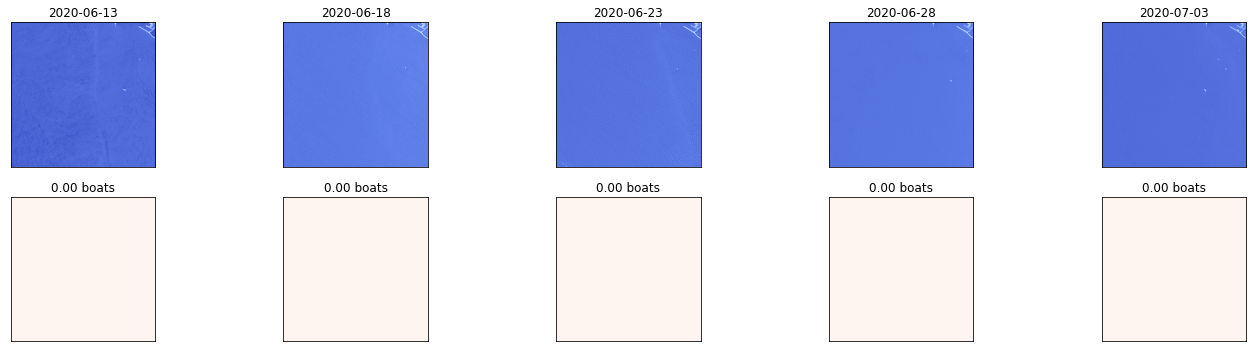

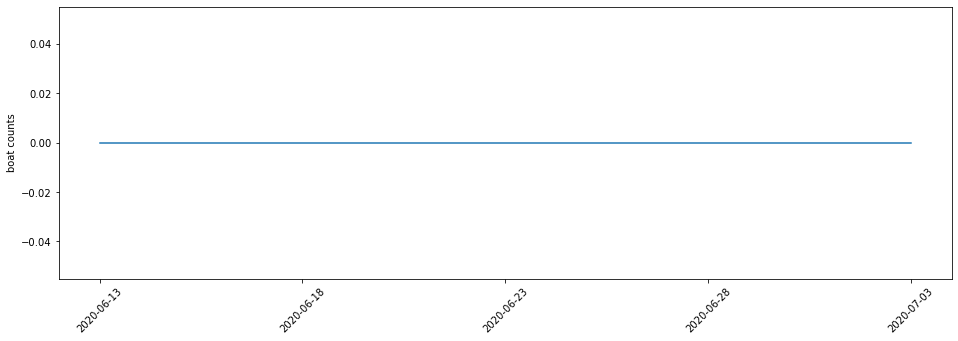

In [40]:
boat_traffic, heatmaps = scan_AOI(interest=interest,
                        time_windows=[
                                      [start_date, end_date]
                                     ], 
                        data_dir=data_dir, checkpoint_dir=checkpoint_dir, version=version,
                        time_period=time_period, max_cloud_proba=max_cloud_proba, override=override)

In [41]:
boat_traffic

{'sines_lat=37.88_lon=-8.91_r=7000_v=0.1.1': {'2018-09-22': 4.655680179595947,
  '2018-09-27': 5.945218563079834,
  '2018-10-02': 3.9297428131103516,
  '2018-10-07': 3.9998977184295654,
  '2018-10-17': 6.944831371307373,
  '2018-10-22': 9.968382835388184,
  '2018-10-27': 61.59204864501953,
  '2018-11-06': 3.995333671569824,
  '2018-11-16': 5.63987922668457,
  '2018-11-21': 4.680217742919922,
  '2018-12-01': 8.16181468963623,
  '2018-12-06': 10.477556228637695,
  '2018-12-11': 0.9999853372573853,
  '2018-12-16': 4.730526924133301,
  '2018-12-21': 5.925252437591553,
  '2018-12-26': 8.002782821655273,
  '2018-12-31': 10.456999778747559,
  '2019-01-05': 9.52542495727539,
  '2019-01-10': 6.863113880157471,
  '2019-01-20': 121.61527252197266,
  '2019-01-25': 6.086809158325195,
  '2019-02-04': 6.952395439147949,
  '2019-02-09': 10.346190452575684,
  '2019-02-14': 5.097423553466797,
  '2019-02-19': 13.334929466247559,
  '2019-02-24': 18.47366714477539,
  '2019-03-11': 10.479503631591797,
  '20

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81

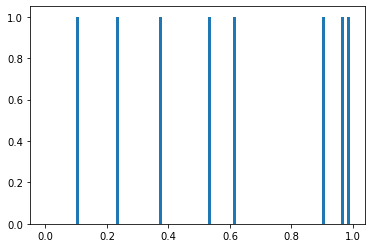

In [50]:
import matplotlib.pyplot as plt
import numpy as np
test_hm = np.reshape(heatmaps[0][-2], -1)
test_hm[test_hm == 0] = np.nan

plt.hist(test_hm, bins=np.arange(0, 1, 0.01))
# np.count_nonzero(heatmaps[0][-1])

In [52]:
from skimage.io import imsave
imsave("../data/testimage.png", heatmaps[0][-2])

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


## 3. Plot results

In [ ]:
analyze_boat_traffic(boat_traffic, kernel_size=1, week_day=None, aggregate_by_month=True, # optionally filter by week day and aggregate results by months
                     deltas=[ [['2018-12-22','2019-03-21'], ['2019-12-22','2020-03-21']], [['2019-03-22','2019-06-21'], ['2020-03-22','2020-06-21']]],
                    )

In [ ]:
##### TODO: Filter cube dates with previous results and save what is new.
##### TODO: Save heatmaps/density maps (T,1,H,W) and cloud coverage
##### TODO: Edit data/aoi.json radius
##### TODO: Automate analysis for AOI + time window